In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
# plt.rcParams.keys()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('../../datasets/group_14.csv')
df["focus_factor"] = (
    df["focus_factor"]
    .astype(str)                  # ensure it's string
    .str.replace(",", ".", regex=False)  # replace comma with dot
)
df["focus_factor"] = pd.to_numeric(df["focus_factor"], errors="coerce")

Convert the categorical column into dummy variables, perform 10 fit–predict(Using hold out methods) runs on X_train and X_test using all features, and calculate the average R² and MSE scores to evaluate overall model performance.

In [10]:
# Encode categorical variable
df_encoded = pd.get_dummies(data=df, columns=["target_class"], drop_first=True)

y = df_encoded['target_regression']
X = df_encoded.drop(columns=["target_regression"])

Demonstrate Distribution and Residuals graph

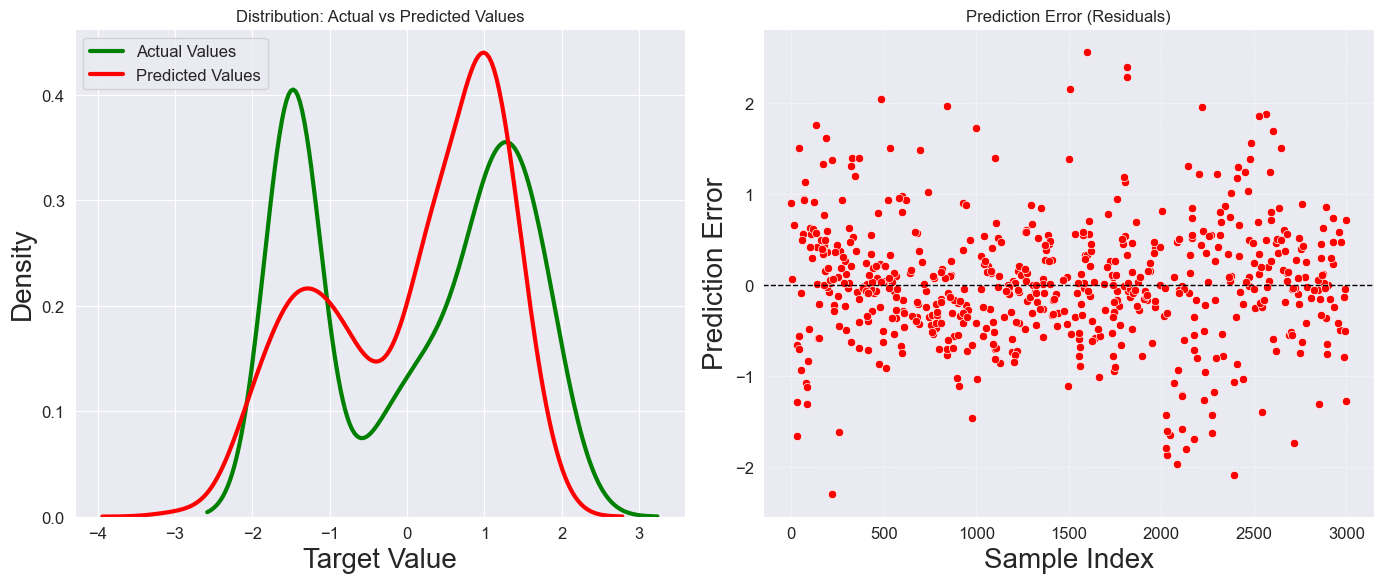

MAE (Train): 0.49862291469494646
R² (Test): 0.7292978904868377


In [11]:

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

predictions = lr_model.predict(X_test)
# Create DataFrame for plotting
df_plot = pd.DataFrame({
    'pr_result': predictions,
    'pr_error': y_test - predictions
})

# Create figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- (1) Distribution plot: Actual vs Predicted ---
sns.kdeplot(y_test, color="g", label="Actual Values", ax=axes[0])
sns.kdeplot(df_plot['pr_result'], color="r", label="Predicted Values", ax=axes[0])
axes[0].set_title("Distribution: Actual vs Predicted Values", fontsize=12)
axes[0].legend()
axes[0].set_xlabel("Target Value")
axes[0].set_ylabel("Density")

# --- (2) Prediction error (residuals) scatter plot ---
sns.scatterplot(x=df_plot.index, y='pr_error', data=df_plot, color="r", ax=axes[1])
axes[1].set_title("Prediction Error (Residuals)", fontsize=12)
axes[1].set_ylabel("Prediction Error")
axes[1].set_xlabel("Sample Index")
axes[1].axhline(0, color='black', linestyle='--', linewidth=1)  # reference line at 0
axes[1].grid(True, linestyle=':', linewidth=0.7)

plt.tight_layout()
plt.show()

print("MAE (Train):", mean_absolute_error(y_test, predictions))
print("R² (Test):", r2_score(y_test, predictions))

Show scatter plots for all features against their respective predictions.

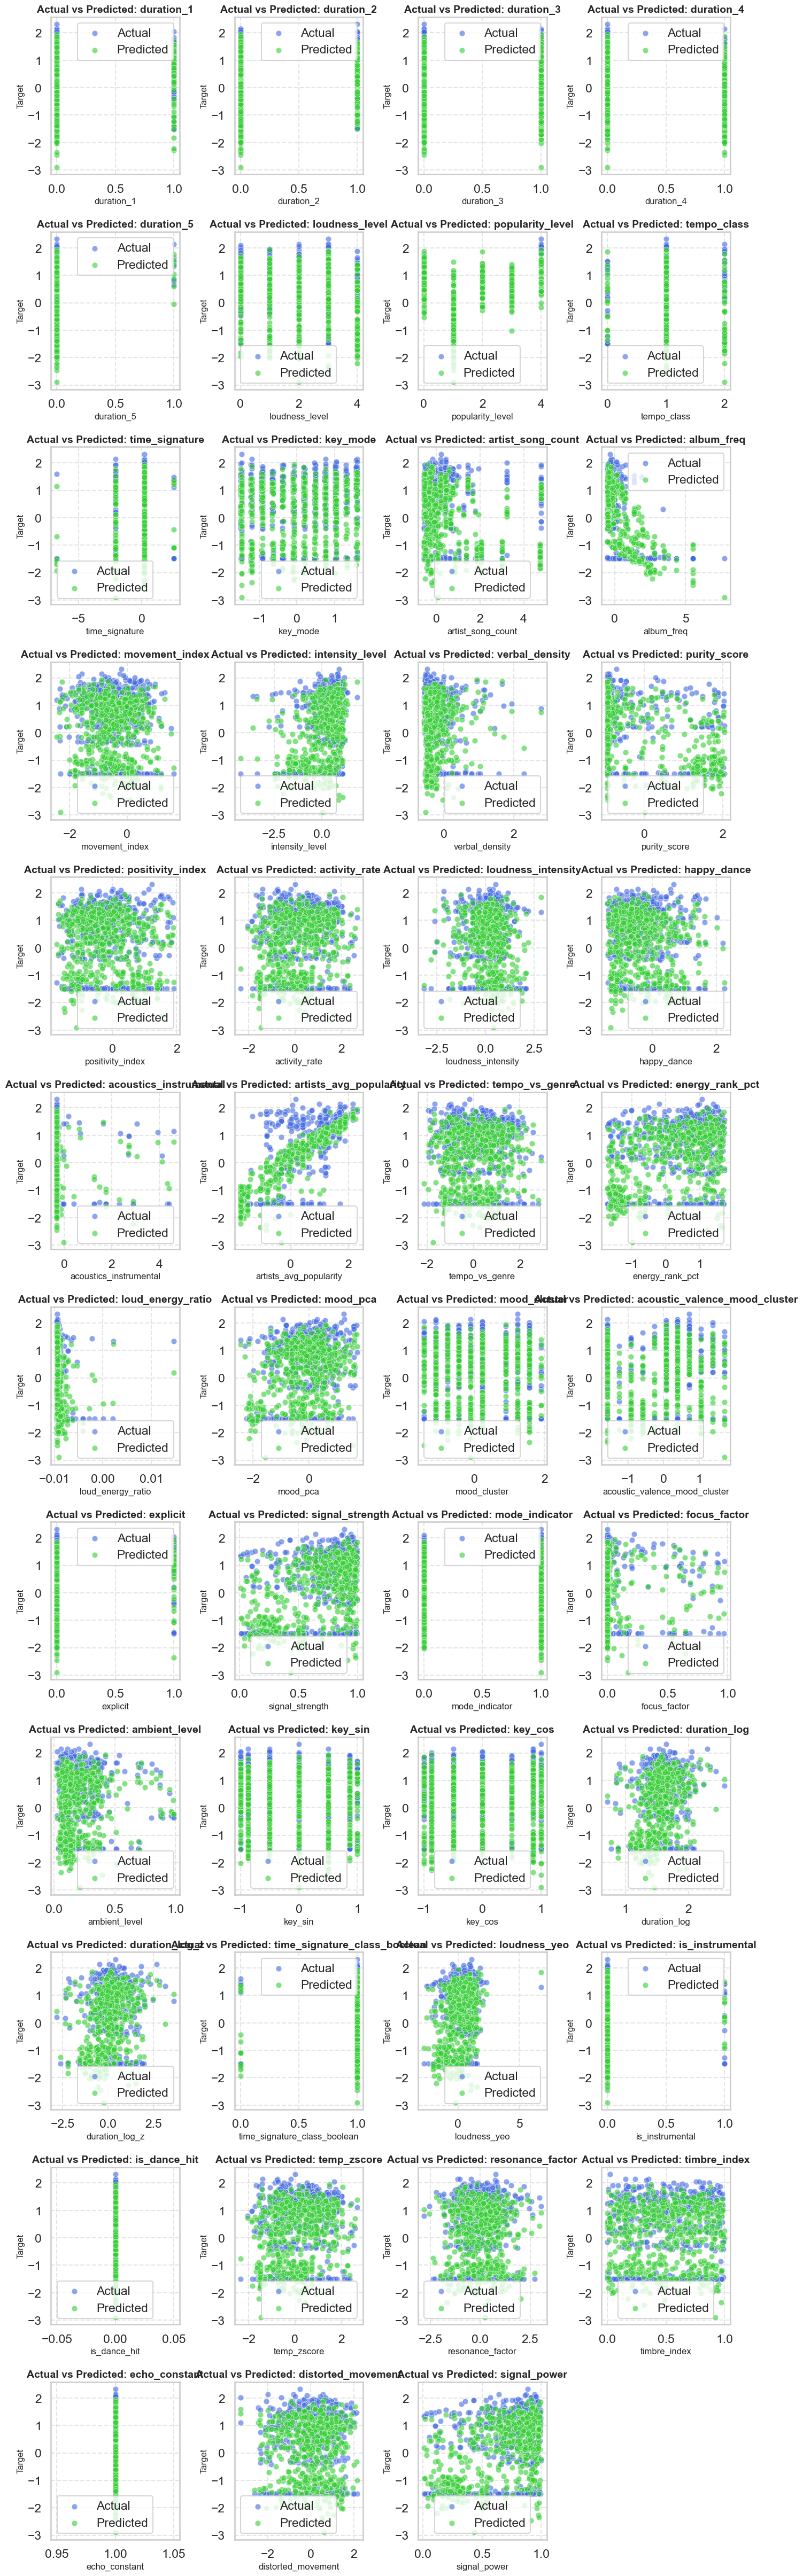

In [43]:
# --- Set Seaborn theme ---
sns.set_theme(style='whitegrid')
sns.set_context("talk")  # larger fonts for readability

# --- Use TEST DATA (correct for evaluation plots) ---
X_plot = X_test.copy()
y_plot = y_test.copy()
predictions_plot = predictions

# Select only numerical features
num_features = X_plot.select_dtypes(include='number').columns.tolist()

# Create subplots grid
n = len(num_features)
cols = 4
rows = (n + 2) // cols + ((n + 2) % cols > 0)  # +2 for dist & residual plots

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4))
axes = axes.flatten()

# --- Scatter plots: actual vs predicted per feature ---
for i, feature in enumerate(num_features):
    sns.scatterplot(
        x=X_plot[feature], y=y_plot,
        color='royalblue', label='Actual', s=60, alpha=0.6, ax=axes[i]
    )
    sns.scatterplot(
        x=X_plot[feature], y=predictions_plot,
        color='limegreen', label='Predicted', s=60, alpha=0.6, ax=axes[i]
    )
    axes[i].set_title(f"Actual vs Predicted: {feature}", fontsize=14, weight='bold')
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("Target", fontsize=12)
    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.5)


# Remove any unused axes
for j in range(n , len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()